Flight Price Dataset – Exploratory Data Analysis (EDA) Assignment

Part 1: Data Loading and Basic Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('flight_price.xlsx')

In [3]:
# Display first 5 and last 5 rows
print(df.head())
print(df.tail())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
           Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Ko

In [4]:
# Check for null values
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [5]:
# Basic information and statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


Part 2: Data Cleaning and Preprocessing

In [6]:
# Convert date columns to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y', errors='coerce')

In [7]:
# Convert to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

/tmp/ipython-input-2981799076.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
/tmp/ipython-input-2981799076.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [8]:
# Extract day and month
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [9]:
# Extract hour and minute from times
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

Convert Duration

In [10]:
# Ensure Duration is a string first
df['Duration'] = df['Duration'].astype(str)

In [11]:
# Function to convert duration to total minutes
def convert_duration(duration):
    h, m = 0, 0
    if 'h' in duration:
        h = int(duration.split('h')[0])
        duration = duration.split('h')[1]
    if 'm' in duration:
        m = int(duration.split('m')[0].strip())
    return h*60 + m

df['Duration_mins'] = df['Duration'].apply(convert_duration)

Encode Categorical Variables

In [12]:
# Encode 'Total_Stops'
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0,
                                                '1 stop': 1,
                                                '2 stops': 2,
                                                '3 stops': 3,
                                                '4 stops': 4})

/tmp/ipython-input-7159883.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0,


In [13]:
# One-hot encoding for 'Airline', 'Source', and 'Destination'
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)

In [14]:
# Encode 'Additional_Infomation'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])

Part 3: Univariate Analysis

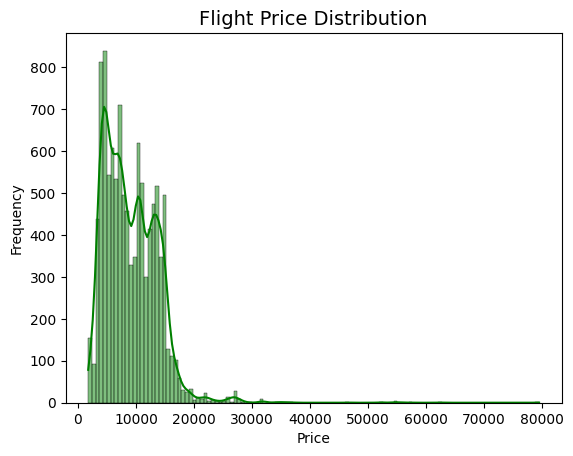

In [15]:
# Price Distribution
sns.histplot(df['Price'], kde=True, color='green')
plt.title('Flight Price Distribution', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

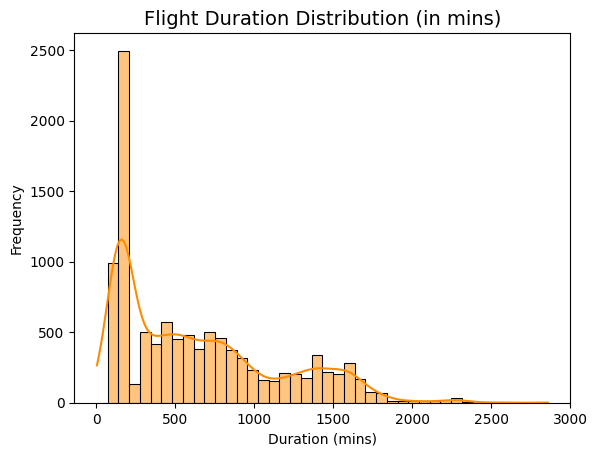

In [16]:
# Duration Distribution
sns.histplot(df['Duration_mins'], kde=True, color='darkorange')
plt.title('Flight Duration Distribution (in mins)', fontsize=14)
plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.show()

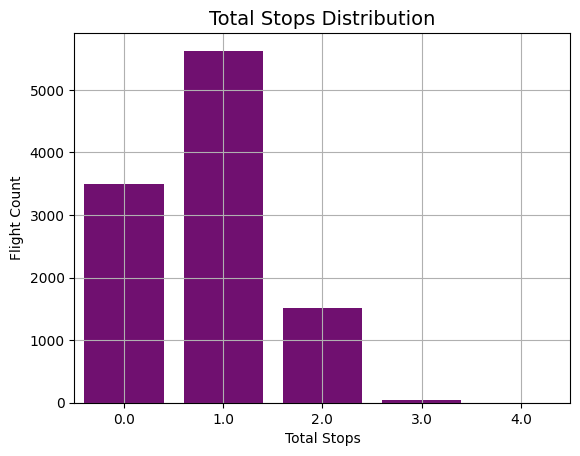

In [17]:
# Total Stops
sns.countplot(x='Total_Stops', data=df, color='Purple')
plt.title("Total Stops Distribution", fontsize=14)
plt.xlabel("Total Stops")
plt.ylabel("Flight Count")
plt.grid(True)
plt.show()

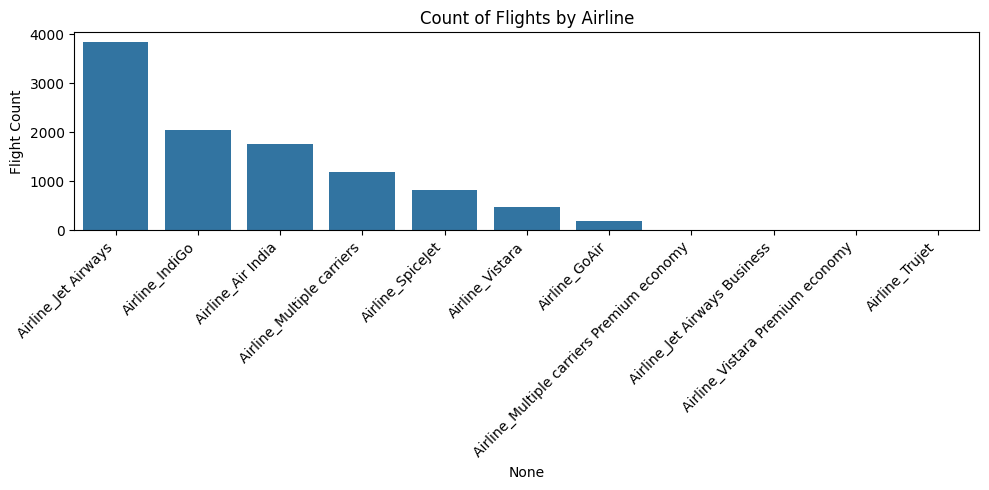

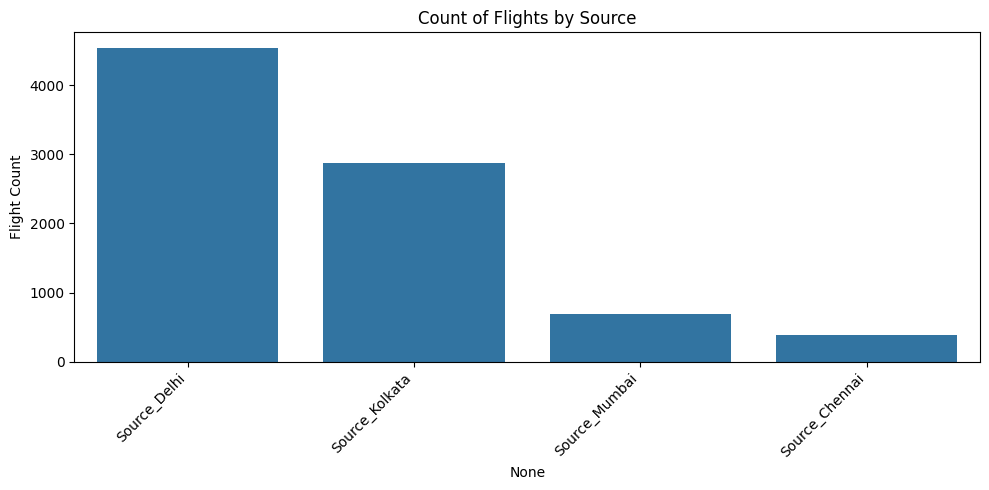

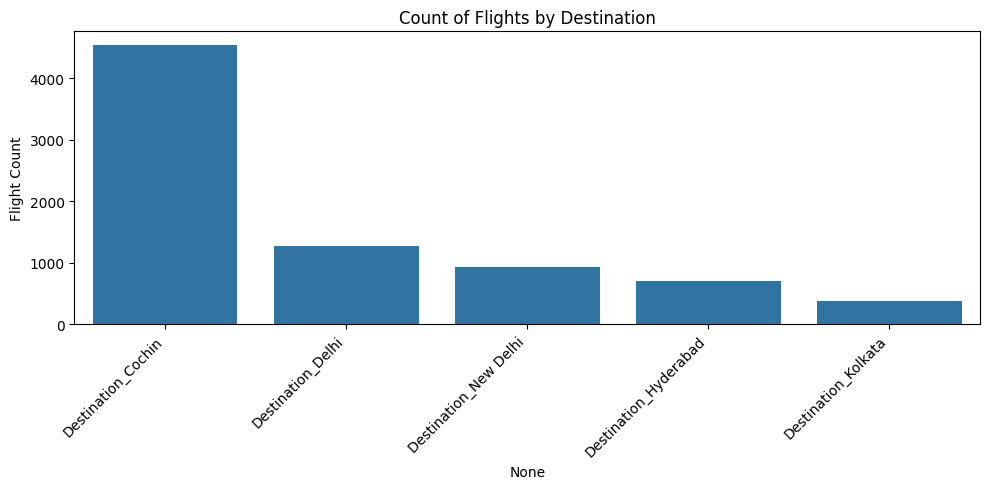

In [20]:
# Flight count by Airline, Source, Destination
# Get the list of one-hot encoded columns for Airline, Source, and Destination
airline_cols = [col for col in df.columns if col.startswith('Airline_')]
source_cols = [col for col in df.columns if col.startswith('Source_')]
destination_cols = [col for col in df.columns if col.startswith('Destination_')]

for col_list, title_prefix in zip([airline_cols, source_cols, destination_cols], ['Airline', 'Source', 'Destination']):
    # Sum the boolean values in the one-hot encoded columns to get the counts
    counts = df[col_list].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts.index, y=counts.values)
    plt.xticks(rotation=45, ha='right') # Adjust rotation and alignment for better readability
    plt.title(f'Count of Flights by {title_prefix}')
    plt.ylabel('Flight Count')
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

Part 4: Bivariate and Multivariate Analysis

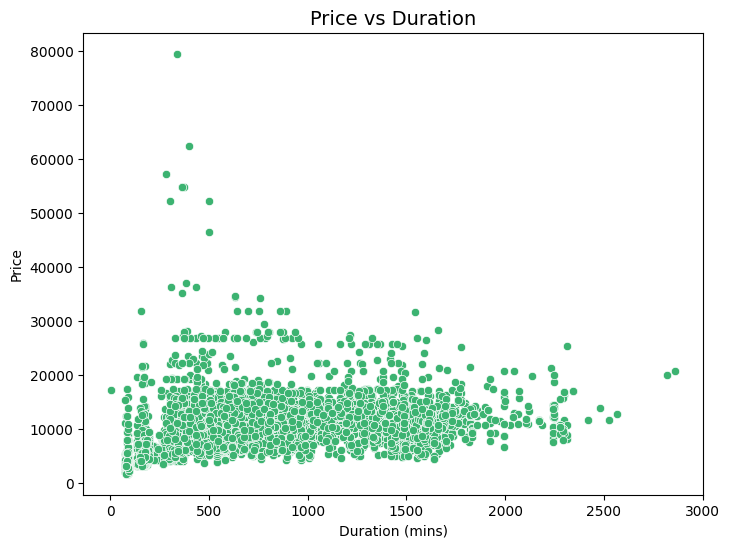

In [21]:
# Price vs Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration_mins', y='Price', data=df, color='mediumseagreen')
plt.title('Price vs Duration', fontsize=14)
plt.xlabel('Duration (mins)')
plt.ylabel('Price')
plt.show()

/tmp/ipython-input-715365507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Airline', y='Price', data=df_original, palette='pastel')


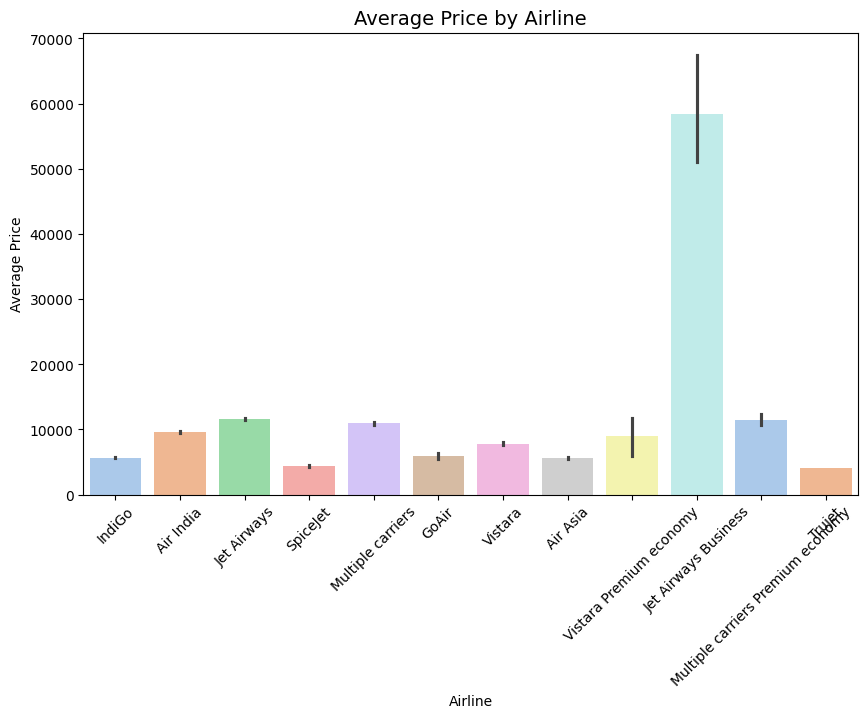

In [22]:
# Average Price by Airline
plt.figure(figsize=(10,6))
df_original = pd.read_excel('flight_price.xlsx')
sns.barplot(x='Airline', y='Price', data=df_original, palette='pastel')
plt.xticks(rotation=45)
plt.title('Average Price by Airline', fontsize=14)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()


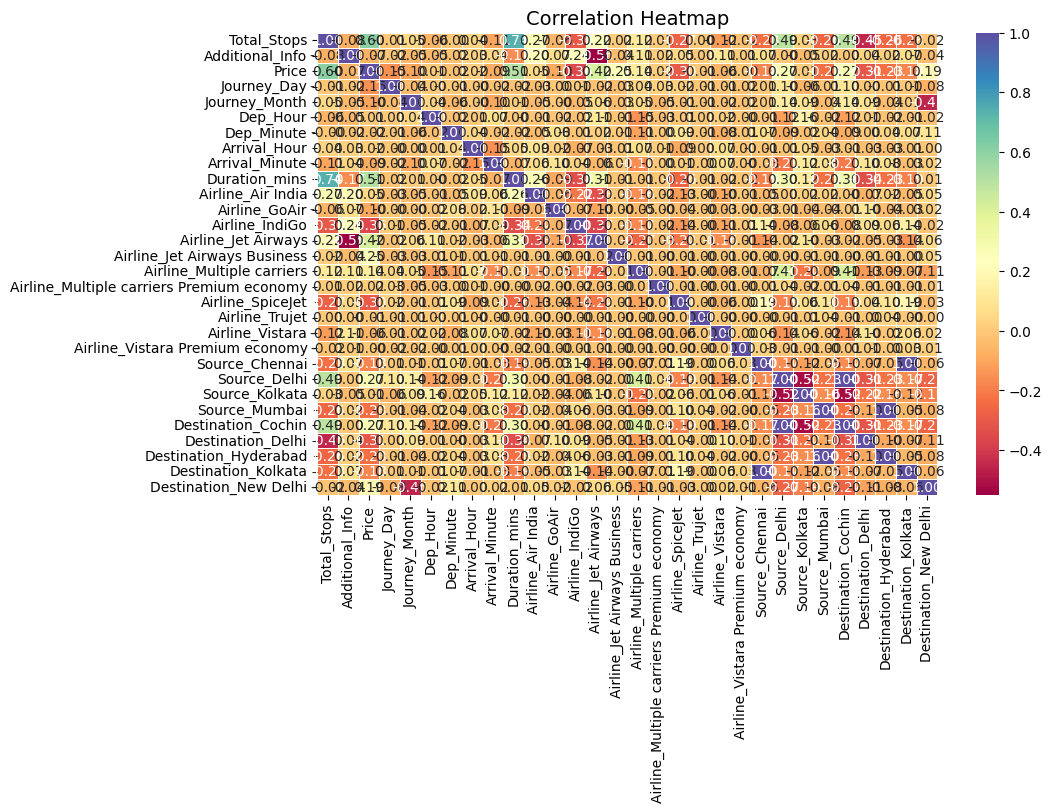

In [23]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

Part 5: Feature Engineering (Bonus)

In [24]:
# Time of Day
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Dep_Time_of_Day'] = df['Dep_Hour'].apply(get_time_of_day)

In [25]:
# Weekday vs Weekend
df['Journey_Weekday'] = df['Date_of_Journey'].dt.dayofweek
df['Is_Weekend'] = df['Journey_Weekday'].apply(lambda x: 1 if x>=5 else 0)

In [26]:
# Rush Hour (7–9am or 4–7pm)
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

/tmp/ipython-input-684234376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dep_Time_of_Day', y='Price', data=df, palette='Set1')


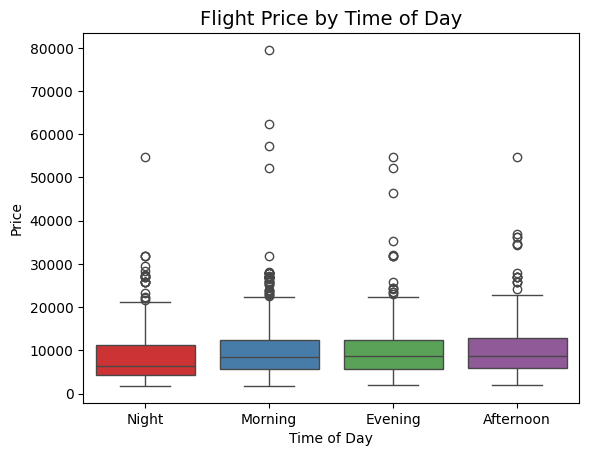

In [27]:
# Price by Time of Day
sns.boxplot(x='Dep_Time_of_Day', y='Price', data=df, palette='Set1')
plt.title('Flight Price by Time of Day', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.show()

/tmp/ipython-input-645044412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Weekend', y='Price', data=df, palette='Accent')


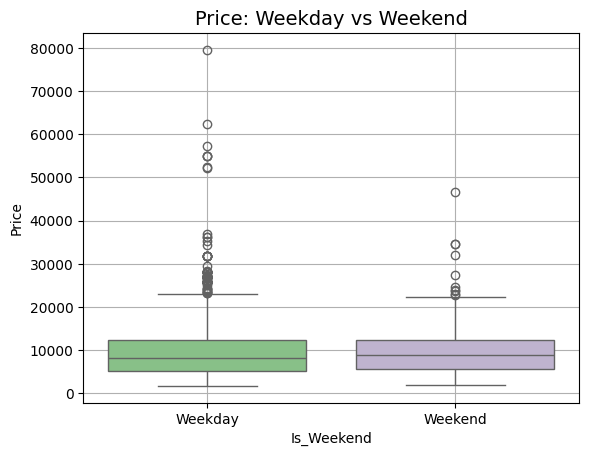

In [28]:
# Weekday vs Weekend
sns.boxplot(x='Is_Weekend', y='Price', data=df, palette='Accent')
plt.title("Price: Weekday vs Weekend", fontsize=14)
plt.xticks([0, 1], ['Weekday', 'Weekend']) # Add this line to label the x-axis ticks
plt.grid(True)
plt.show()

/tmp/ipython-input-823212637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Rush_Hour', y='Price', data=df, palette='Set1')


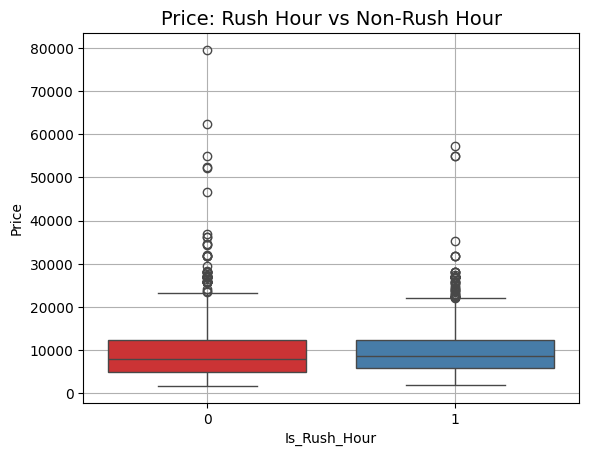

In [29]:
# Rush Hour effect
sns.boxplot(x='Is_Rush_Hour', y='Price', data=df, palette='Set1')
plt.title("Price: Rush Hour vs Non-Rush Hour", fontsize=14)
plt.grid(True)
plt.show()

Part 6: Insights & Reporting

TOP 5 INSIGHTS FROM THE ANALYSIS

 1. Flights with More Stops Are Cheaper

Observation: As the number of stops increases (1-stop, 2-stops, etc.), the average flight price tends to decrease.

Explanation: Non-stop or direct flights are usually more convenient and thus priced higher.

Data Source: Total_Stops vs. Price barplots and scatterplots.

2. Evening and Weekend Flights Are More Expensive

Observation: Flights departing in the evening (5–9 PM) and during weekends (Saturday and Sunday) showed higher average prices.

Explanation: These time slots are more desirable due to convenience and availability for leisure travel.

Data Source: Boxplots of Dep_Time_of_Day and Is_Weekend vs. Price.

 3. Certain Airlines Are Consistently Cheaper or More Expensive

Observation: Budget carriers (like IndiGo, AirAsia, etc.) have lower average prices, while premium carriers (like Air India or Vistara) charge significantly more.

Explanation: Premium services, additional baggage, and better in-flight experiences justify the higher prices.

Data Source: Airline vs. Price barplot and groupby averages.

4. Flight Duration Is Positively Correlated with Price

Observation: Longer flight durations generally show higher prices.

Explanation: Duration reflects either actual flight length or layovers, and longer flights typically involve more fuel, crew time, and logistics.

Data Source: Correlation heatmap and scatterplot of Duration_mins vs. Price.

 5. Source and Destination City Pairings Impact Price

Observation: Certain Source-Destination pairs (e.g., from major metro cities to tourist hubs) have significantly higher or lower average prices.

Explanation: This reflects market demand and supply dynamics on certain popular routes.

Data Source: Grouped averages by Source and Destination, and heatmaps.

FACTORS INFLUENCING FLIGHT PRICES


1. Number of Stops

Non-stop flights are more expensive due to convenience and shorter travel time.

2. Airline Type

Premium airlines charge more for added services; budget carriers offer lower fares.

3. Departure Time

Flights during peak hours (morning/evening) cost more due to higher demand.

4. Travel Day

Weekend flights are pricier than weekday ones, driven by leisure travel demand.

5. Flight Duration

Longer flights generally cost more due to increased fuel and operational expenses.

6. Route (Source–Destination)

Some city pairs are more expensive due to high demand or limited flight options.

7. Additional Services

Extras like meals, baggage, or business class increase flight prices.


 SUGGESTIONS FOR TRAVELERS BASED ON FINDINGS

1. Choose flights with stops

These are usually more affordable than non-stop options, especially for longer routes.

2. Avoid peak hours

Flights departing in the early morning or evening are in high demand and tend to be pricier.

3. Fly on weekdays
Midweek flights, especially on Tuesdays and Wednesdays, often have lower fares due to less demand.

4. Compare airlines

Budget airlines typically offer cheaper tickets, though services may be limited compared to premium carriers.

5. Check nearby airports

Flying into or out of alternative airports can lead to significant cost savings on certain routes.

6. Book early for busy times

Prices rise closer to weekends, holidays, or peak seasons, so booking in advance can lock in lower fares.